In [ ]:
import pandas as pd
import re

In [509]:
data = pd.read_csv("/content/output.csv")

In [510]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1237 non-null   object
 1   price              1237 non-null   object
 2   owner              1237 non-null   object
 3   driven km          1237 non-null   object
 4   transmission       1237 non-null   object
 5   fuel               1237 non-null   object
 6   body type          1237 non-null   object
 7   mileage            1237 non-null   object
 8   engine cc          1237 non-null   object
 9   max power bhp      1237 non-null   object
 10  wheel size inches  1237 non-null   object
 11  no of seats        1237 non-null   object
dtypes: object(12)
memory usage: 116.1+ KB


In [511]:
data.head()

,name,price,owner,driven km,transmission,fuel,body type,mileage,engine cc,max power bhp,wheel size inches,no of seats
0,Volkswagen Polo HIGHLINE1.2L DIESEL 2012,"₹ 2,70,000",Second Owner,120000 Km,Manual,Diesel,Hatchback,22 Kmpl,1199 cc,74 bhp,15'',5 Seater
1,Hyundai Creta S 1.5 Petrol BS6 2020,"₹ 12,15,000",First Owner,8000 Km,Manual,Petrol,SUV,16.8 kmpl,1497 cc,113 bhp,16 inch,5 Seater
2,Honda City VX i-DTEC 2017,"₹ 9,00,000",First Owner,45000 Km,Manual,Diesel,Sedan,26 kmpl,1498 cc,99 bhp,15 inch,5 Seater
3,Skoda Fabia ELEGANCE 1.2 TDI 2012,"₹ 3,50,000",First Owner,66000 Km,Manual,Diesel,Hatchback,15.9 kmpl,1199 cc,75bhp,14 Inch,5 Seater
4,Volkswagen Vento Highline Diesel 2013,"₹ 3,60,000",First Owner,39000 Km,Manual,Diesel,Sedan,20.5 kmpl,1598 cc,103 bhp,15 inches,5 Seater


In [512]:
data.describe()

,name,price,owner,driven km,transmission,fuel,body type,mileage,engine cc,max power bhp,wheel size inches,no of seats
count,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
unique,1012,612,5,477,3,5,9,283,121,197,55,7
top,Toyota Fortuner 2.8 4x4 AT 2018,"₹ 45,00,000",First Owner,50000 Km,Manual,Diesel,Hatchback,14.24 kmpl,1197 cc,174 bhp,14 Inch,5 Seater
freq,10,16,1053,55,883,647,416,41,168,51,216,1054


In [513]:
data["owner"].unique()

array(['Second Owner', 'First Owner', 'Third Owner', 'Fourth Owner',
       'Sixth Owner'], dtype=object)

In [514]:
data["transmission"].unique()

array(['Manual', 'Automatic', 'Automated Manual Transmission'],
      dtype=object)

In [515]:
len(data[data["transmission"] == 'Automated Manual Transmission'])

20

In [516]:
data["fuel"].unique()

array(['Diesel', 'Petrol', 'Petrol + CNG', 'Petrol + LPG', 'Hybrid'],
      dtype=object)

In [517]:
data["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Crossover', 'Van',
       'Convertible', 'Coupe', 'Sports'], dtype=object)

In [518]:
# converting categorical data into numerical data
owner = {"First Owner" : 1,
        "Second Owner" : 2,
        "Third Owner" : 3,
        "Fourth Owner" : 4,
        "Fifth Owner" : 5,
        "Sixth Owner" : 6}
data["owner"] = data["owner"].replace(owner)


transmission = {"Manual" : 0,
                "Automatic" : 1,
                "Automated Manual Transmission" : 1}
data["transmission"] = data["transmission"].replace(transmission)


fuel = {"Diesel" : 1,
        "Petrol" : 2,
        "Petrol + CNG" : 3,
        "Petrol + LPG" : 4,
        "Hybrid" : 5}
data["fuel"] = data["fuel"].replace(fuel)


body_type = {"Hatchback" : 1,
            "SUV" : 2,
            "Sedan" : 3,
            "MUV" : 4,
            "Crossover" : 5,
            "Van" : 6,
            "Convertible" : 7,
            "Coupe" : 8,
            "Sports" : 9}
data["body type"] = data["body type"].replace(body_type)



# cleaning no of seats column
data["no of seats"] = data["no of seats"].str.extract('(\d+)')
data["no of seats"] = data["no of seats"].apply(lambda x: int(x))

# cleaning wheel size column
data["wheel size inches"] = data["wheel size inches"].str.extract('(\d+)')
data = data.drop(data[data['wheel size inches'].isnull()].index)
data["wheel size inches"] = data["wheel size inches"].apply(lambda x: int(x))

# cleaning max power column
data["max power bhp"] = data["max power bhp"].str.extract('(\d+)')
data["max power bhp"] = data["max power bhp"].apply(lambda x: int(x))

# cleaning engine cc column
data["engine cc"] = data["engine cc"].str.extract('(\d+)')
data["engine cc"] = data["engine cc"].apply(lambda x: int(x))

# cleaning mileage cloumn
data["mileage kmpl"] = data["mileage"].str.extract('(\d+.?\d?)')
data["mileage kmpl"] = data["mileage kmpl"].apply(lambda x: x.replace("k", "000"))
data["mileage kmpl"] = data["mileage kmpl"].apply(lambda x: float(x))

# cleaning driven km column
data["driven km"] = data["driven km"].str.extract('(\d+)')
data["driven km"] = data["driven km"].apply(lambda x: int(x))

# cleaning price column
data["price"] = data["price"].apply(lambda x: x.replace(',', ''))
data["price in rupee"] = data["price"].str.extract('(\d+)')
data["price in rupee"] = data["price in rupee"].apply(lambda x: int(x))

# cleaning name column
# creating purchase year column
data["purchase year"] = data["name"].str.extract('(\d\d\d\d)')
data["purchase year"] = data["purchase year"].apply(lambda x: int(x))

# creating company column
data["company"] = data["name"].apply(lambda x: x.split()[0])

# converting catogorical column company to a numerical column
company = list(data["company"].unique())
company_dict = {}
for index,value in enumerate(company):
  company_dict[value] = index
data["company"] = data["company"].replace(company_dict)

In [519]:
cleaned_data = data.drop(['name', 'price', 'mileage'], axis=1)

In [520]:
cleaned_data.head()

,owner,driven km,transmission,fuel,body type,engine cc,max power bhp,wheel size inches,no of seats,mileage kmpl,price in rupee,purchase year,company
0,2,120000,0,1,1,1199,74,15,5,22.0,270000,2012,0
1,1,8000,0,2,2,1497,113,16,5,16.8,1215000,2020,1
2,1,45000,0,1,3,1498,99,15,5,26.0,900000,2017,2
3,1,66000,0,1,1,1199,75,14,5,15.9,350000,2012,3
4,1,39000,0,1,3,1598,103,15,5,20.5,360000,2013,0


In [521]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   owner              1236 non-null   int64  
 1   driven km          1236 non-null   int64  
 2   transmission       1236 non-null   int64  
 3   fuel               1236 non-null   int64  
 4   body type          1236 non-null   int64  
 5   engine cc          1236 non-null   int64  
 6   max power bhp      1236 non-null   int64  
 7   wheel size inches  1236 non-null   int64  
 8   no of seats        1236 non-null   int64  
 9   mileage kmpl       1236 non-null   float64
 10  price in rupee     1236 non-null   int64  
 11  purchase year      1236 non-null   int64  
 12  company            1236 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 135.2 KB


In [522]:
cleaned_data.describe()

,owner,driven km,transmission,fuel,body type,engine cc,max power bhp,wheel size inches,no of seats,mileage kmpl,price in rupee,purchase year,company
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000,1236.000000
mean,1.191748,49165.372977,0.286408,1.496764,2.258900,1637.909385,114.567152,15.398058,5.263754,59.941100,1.201285e+06,2015.036408,6.813107
std,0.513428,38489.467541,0.452265,0.545120,1.156972,634.022375,53.146147,6.171120,0.742038,835.962072,2.166494e+06,3.437747,5.133823
min,1.000000,500.000000,0.000000,1.000000,1.000000,624.000000,21.000000,12.000000,2.000000,6.700000,1.700000e+04,2003.000000,0.000000
25%,1.000000,24987.500000,0.000000,1.000000,1.000000,1197.000000,81.000000,14.000000,5.000000,15.100000,3.900000e+05,2013.000000,2.000000
50%,1.000000,48000.000000,0.000000,1.000000,2.000000,1495.500000,99.000000,15.000000,5.000000,18.500000,6.250000e+05,2016.000000,6.000000
75%,1.000000,65030.750000,1.000000,2.000000,3.000000,1991.000000,140.000000,16.000000,5.000000,21.400000,1.150000e+06,2018.000000,11.000000
max,6.000000,750000.000000,1.000000,5.000000,9.000000,6749.000000,601.000000,225.000000,9.000000,17000.000000,4.500000e+07,2021.000000,25.000000


In [523]:
cleaned_data.to_csv("output_numerical.csv")

In [524]:
import seaborn as sns

In [525]:
cleaned_data.corr()["price in rupee"]

owner               -0.055281
driven km           -0.151745
transmission         0.420417
fuel                -0.186224
body type            0.184124
engine cc            0.588915
max power bhp        0.636804
wheel size inches    0.133951
no of seats          0.158183
mileage kmpl        -0.023932
price in rupee       1.000000
purchase year        0.251187
company              0.054010
Name: price in rupee, dtype: float64

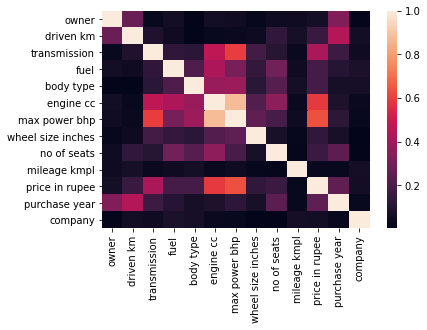

In [526]:
sns.heatmap(np.abs(cleaned_data.corr()))